<a href="https://colab.research.google.com/github/MaureenMao/Mureka/blob/master/%E2%80%9C04_training_linear_models_ipynb%E2%80%9D_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Credit card Fraud versus a set of Models**

_This notebook contains an example of running several models against a credit card fraud dataset pulled from Kaggle._


# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

Use the jupyter notebook I created for the SMOTE video lecture for credit card fraud data and

Build a "VotingClassifier" using logistic regression, decision tree, and SVM
Build a Random Forest Model
Build an xgboost model
Use SMOTE to help balance the data.

Pick your best model based on AUC and post it at the bottom of your submission. Include any transformations you used including SMOTE. 

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Load Data

I loaded the card fraud data from an S3 bucket on AWS for you.

In [11]:
import pandas as pd
cfraud=pd.read_csv("https://s3.amazonaws.com/www.ruxton.ai/creditcard.csv")
cfraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0


# Some Minimal EDA

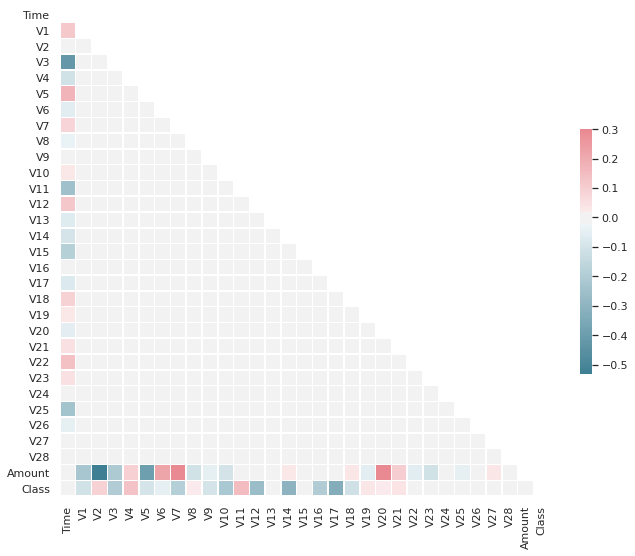

In [12]:
from string import ascii_letters

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = cfraud.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
use=list(cfraud.columns.values[[1,2,3,4,5,6,7,9,10,11,12,14,16,17,18,19,28]])  # use all the predictor data for example
print(use)
 

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V28']


EDA: Before fitting models, you should do EDA. Do you want to add any features as combos of others?

Transform data here

That looks awful. Let's try and dientify predictors that are intrinsic to banks balance sheet.

That looks better. Now try some other methods like random forest SVM, xgboost, decisio trees. Try tuning them. Which do you choose?

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn import metrics

#import voting classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

h = .02  # step size in the mesh

names = [ "SVC", "Logistic",
         "Decision Tree", "Random Forest", "XGBoost"]

classifiers = [
    SVC(kernel="linear", C=0.025),
    LogisticRegression(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(random_state=666),
    XGBClassifier()]

X, y = make_classification(n_features=5, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


# preprocess dataset, split into training and test part
X, y = cfraud[use],cfraud["Class"]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.3, random_state=42)

sm = SMOTE(random_state=42,sampling_strategy=.015)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())






In [0]:
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

clf1 = SVC(kernel="linear", C=0.025)
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier(max_depth=5)
clf4 = RandomForestClassifier(random_state=666)
clf5 = XGBClassifier()

print('5-fold cross validation:\n')

labels = ['SVC', 'Logistic Regression', 
          'Decesion Tree', 'Random Forest', 'XBG']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, y, cv=5, 
              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
voting_clf_hard = VotingClassifier(estimators=[
  (labels[0], clf1),
  (labels[1], clf2),
  (labels[2], clf3),
  (labels[3], clf4),
  (labels[4], clf5)],
  voting='hard')

labels_new = ['SVC', 'Logistic Regression', 
          'Decesion Tree', 'Random Forest', 'XBG',
              'Voting_Classifier_Hard']

voting_clf_hard = voting_clf_hard.fit(X, y)
for (clf, label) in zip([clf1, clf2, clf3, clf4,
                  clf5, voting_clf_hard], labels_new):
  scores = model_selection.cross_val_score(clf, X, y, cv=5, 
                          scoring='accuracy')
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


5-fold cross validation:

Accuracy: 1.00 (+/- 0.00) [SVC]
Accuracy: 1.00 (+/- 0.00) [Logistic Regression]
Accuracy: 1.00 (+/- 0.00) [Decesion Tree]
Accuracy: 1.00 (+/- 0.00) [SVC]
Accuracy: 1.00 (+/- 0.00) [Logistic Regression]
Accuracy: 1.00 (+/- 0.00) [Decesion Tree]
Accuracy: 1.00 (+/- 0.00) [Random Forest]
Accuracy: 1.00 (+/- 0.00) [XBG]
Accuracy: 1.00 (+/- 0.00) [Voting_Classifier_Hard]


In [17]:
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

clf1 = SVC(kernel="linear", C=0.025)
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier(max_depth=5)
clf4 = RandomForestClassifier(random_state=666)
clf5 = XGBClassifier()

print('5-fold cross validation:\n')

labels = ['SVC', 'Logistic Regression', 
          'Decesion Tree', 'Random Forest', 'XBG']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, y, cv=5, 
              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
voting_clf_hard = VotingClassifier(estimators=[
  (labels[0], clf1),
  (labels[1], clf2),
  (labels[2], clf3),
  (labels[3], clf4),
  (labels[4], clf5)],
  voting='hard')

labels_new = ['SVC', 'Logistic Regression', 
          'Decesion Tree', 'Random Forest', 'XBG',
              'Voting_Classifier_Hard']

voting_clf_hard = voting_clf_hard.fit(X, y)
for (clf, label) in zip([clf1, clf2, clf3, clf4,
                  clf5, voting_clf_hard], labels_new):
  scores = model_selection.cross_val_score(clf, X, y, cv=5, 
                          scoring='accuracy')
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


5-fold cross validation:

Accuracy: 1.00 (+/- 0.00) [SVC]
Accuracy: 1.00 (+/- 0.00) [Logistic Regression]
Accuracy: 1.00 (+/- 0.00) [Decesion Tree]
Accuracy: 1.00 (+/- 0.00) [SVC]
Accuracy: 1.00 (+/- 0.00) [Logistic Regression]
Accuracy: 1.00 (+/- 0.00) [Decesion Tree]
Accuracy: 1.00 (+/- 0.00) [Random Forest]
Accuracy: 1.00 (+/- 0.00) [XBG]
Accuracy: 1.00 (+/- 0.00) [Voting_Classifier_Hard]


In [27]:
i=1,  
for name, clf in zip(names, classifiers):
    figure = plt.figure(num=i,figsize=(108, 6))
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)

    fpr, tpr, _ = metrics.roc_curve(y_test, clf.predict(X_test))
    roc_auc = metrics.auc(fpr, tpr)
    
   # Plot of a ROC curve for a specific class
   # plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for '+ name )
    plt.legend(loc="lower right")
    plt.show()

    # Do parallel SMOTE here
    figure = plt.figure(num=i,figsize=(108, 6))
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train_res, y_train_res)

    fpr, tpr, _ = metrics.roc_curve(y_test, clf.predict(X_test))
    roc_auc = metrics.auc(fpr, tpr)
   # Plot of a ROC curve for a specific class
   # plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SMOTE: ROC for '+ name )
    plt.legend(loc="lower right")
    plt.show()

TypeError: ignored